# SSP 2023 Project

This is an example notebook to characterize transits using TESS 20-second cadence data. Many features used here are explained in the lightkurve tutorial exoplanets-identifying-transiting-planet-signals.py - make sure to review this notebook if you have questions about commands used below.

The notebook below goes through the steps of download a TESS 20-second light curve, searching for a transit signal, and fitting a simple transit model. Here are some possible next steps after you've got this working:

1) Mask the signal of the known planet and repeat the search. Are there more significant transit signals in the data?

2) Repeat the procedure using 2-min cadence data. Are the measured transit depths consistent?

3) Are there any features in the 20-sec light curve that are not present in the 2-min data?

Note that you can analyze more stars other than this example - there are over 4000 stars with planet candidates identified by TESS! A full list can be found on the 

In [2]:
import lightkurve as lk
%matplotlib inline

First, we specify the TOI and TIC number of the star we want to study. In this example, we use the well-known star pi Mensae (TOI-144), which was the first discovery of a new planet from TESS. For a full list, see the NASA Exoplanet archive: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI 

In [3]:
toi=573
tic=296780789

In [4]:
# Search for 20-second cadence TESS observations for our star
search_result1 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=20)
search_result2 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=120)

In [5]:
print(search_result1)

print(search_result2)

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 62 2023   SPOC      20   296780789      0.0
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 08 2019   SPOC     120   296780789      0.0
  1 TESS Sector 35 2021   SPOC     120   296780789      0.0
  2 TESS Sector 62 2023   SPOC     120   296780789      0.0


Looks like there is lots of data across the different sectors! To keep things simple, let's only download a single sector of data for now (in the example below we choose index 5, so that's Sector 39). You can experiment with downloading all of the data too.

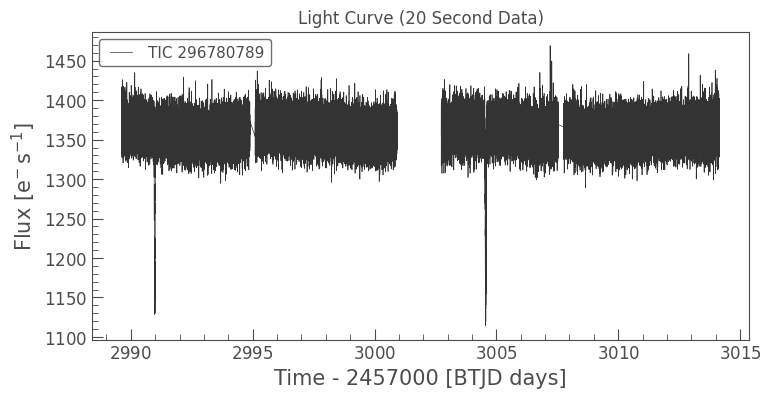

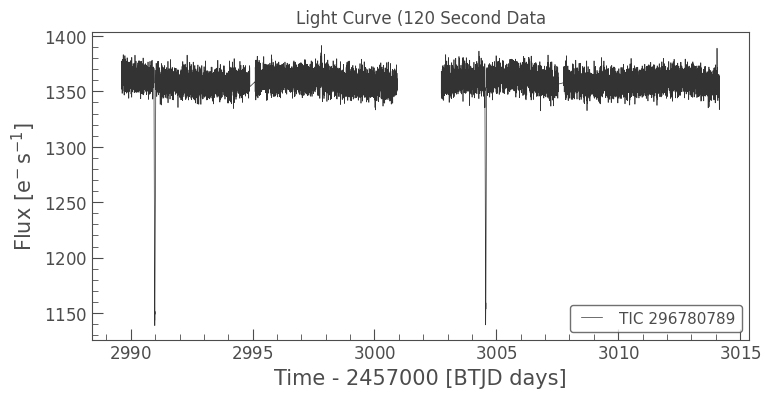

In [6]:
# Download light curve and plot it
lc_collection1 = search_result1[0].download()
lc_collection1.plot().set_title('Light Curve (20 Second Data)')



lc_collection2 = search_result2[2].download()
lc_collection2.plot().set_title('Light Curve (120 Second Data');

You can see quite a few spikes in the light curve, i.e. there are more points going up than down. These are outliers, most likely caused by the different corrections to cosmic rays applied by the TESS project (see Huber et al. 2022 paper). We can reject these using the "remove_outliers" command. We also also normalize the light curve by dividing through the median flux value, which then gives the y-axis values as fractional flux.

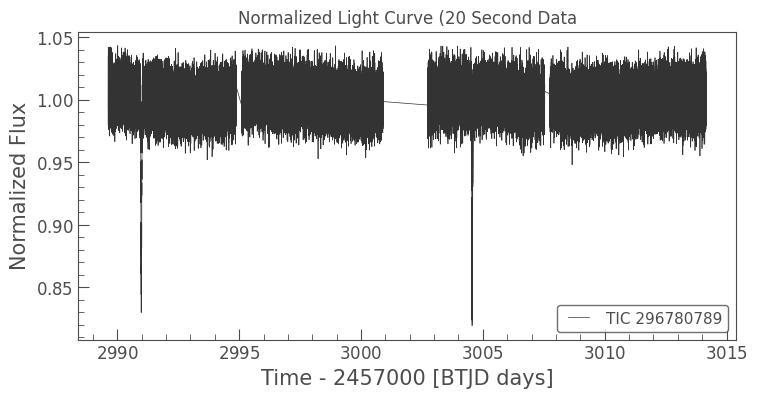

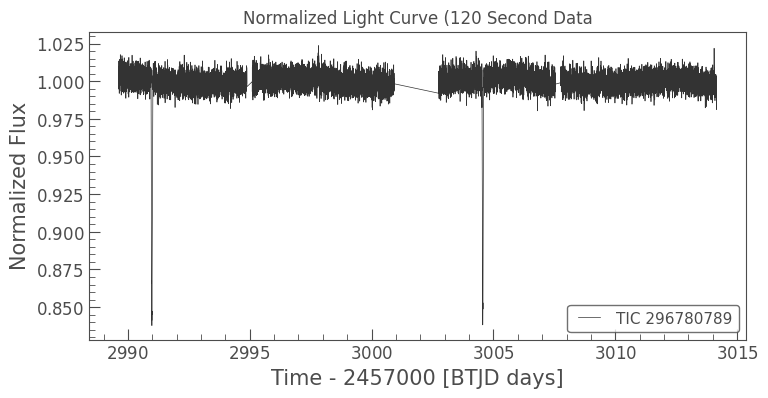

In [7]:
# Flatten the light curve 
lc1 = lc_collection1.normalize().remove_outliers(sigma_upper=3, sigma_lower=float('inf'))
lc1.plot().set_title('Normalized Light Curve (20 Second Data');

lc2 = lc_collection2.normalize().remove_outliers(sigma_upper=3, sigma_lower=float('inf'))
lc2.plot().set_title('Normalized Light Curve (120 Second Data');

Now that we have a good light curve, we can search for transits. If you look carefully you can spot them by eye in the plot above, but often they are so shallow that we need to use other tools to find them. Here we use a tool called "Box Least-Squares", which basically fits a box-shape with different parameters to the light curve and evulates the strength of the signal at a given period.

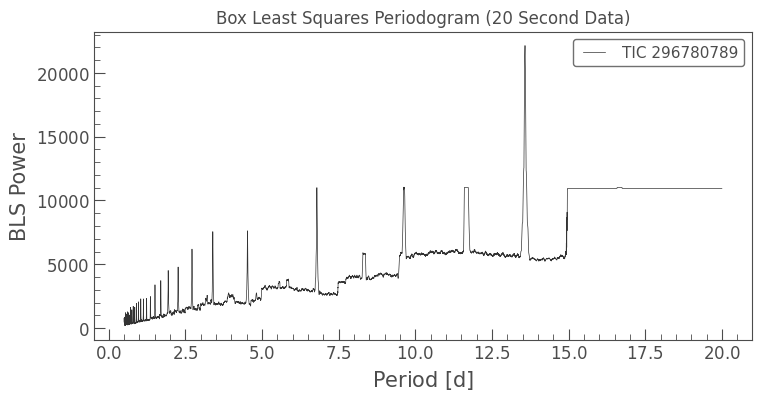

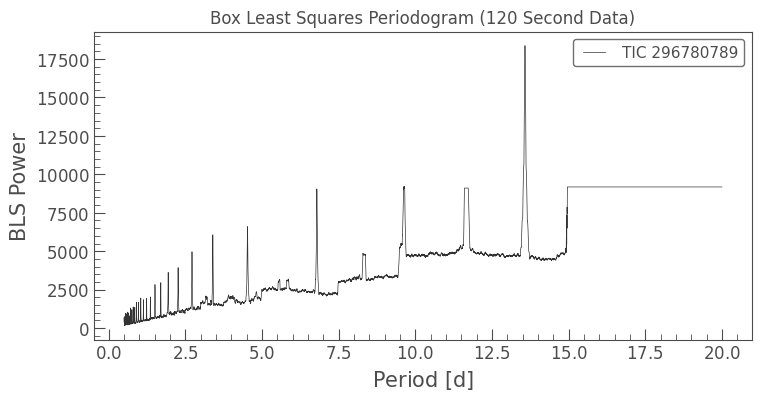

In [8]:
import numpy as np
# Create array of periods to search
period = np.linspace(0.5, 20, 10000)
# Create a BLSPeriodogram
bls1 = lc1.to_periodogram(method='bls', period=period, frequency_factor=500);
bls1.plot().set_title("Box Least Squares Periodogram (20 Second Data)");

bls2 = lc2.to_periodogram(method='bls', period=period, frequency_factor=500);
bls2.plot().set_title("Box Least Squares Periodogram (120 Second Data)");

The resuting plot shows multiple peaks, with are the periods of potential transits. The strongest peak is at ~6.2 days, the period of the known transit of the planet pi Mensae b. You can also see peaks at different periods. Why do you think these peaks exist (hint: compare the periods of those peaks with the period of the planet)?

In [9]:
# save BLS for the strongest peak. The parameters are period, transit midpoint, duration and depth
planet_b_period1 = bls1.period_at_max_power
planet_b_t01 = bls1.transit_time_at_max_power
planet_b_dur1 = bls1.duration_at_max_power
planet_b_depth1 = bls1.depth_at_max_power
print('20 sec:')
print('period:',planet_b_period1)
print('duration:',planet_b_dur1)
print('depth:',planet_b_depth1)

planet_b_period2 = bls2.period_at_max_power
planet_b_t02 = bls2.transit_time_at_max_power
planet_b_dur2 = bls2.duration_at_max_power
planet_b_depth2 = bls2.depth_at_max_power
print('120 sec:')
print('period:',planet_b_period2)
print('duration:',planet_b_dur2)
print('depth:',planet_b_depth2)
print(bls1.max_power)
print(sorted(bls1.power, reverse=True))
print(sorted(bls2.power, reverse=True))


20 sec:
period: 13.578007800780078 d
duration: 0.05 d
depth: 0.11308848127452581
120 sec:
period: 13.576057605760576 d
duration: 0.05 d
depth: 0.11371059613410704
22134.43087497487
[<Quantity 22134.43087497>, <Quantity 22110.2179554>, <Quantity 22070.85895335>, <Quantity 21902.01934168>, <Quantity 21797.96854607>, <Quantity 21721.36177498>, <Quantity 21599.69933611>, <Quantity 21587.55286702>, <Quantity 21437.82305629>, <Quantity 21341.20620096>, <Quantity 21107.43925153>, <Quantity 20939.84278082>, <Quantity 20561.87903014>, <Quantity 20322.05318131>, <Quantity 19936.71718732>, <Quantity 19613.36873619>, <Quantity 19207.57684777>, <Quantity 19065.18679902>, <Quantity 18662.45720458>, <Quantity 18524.15054833>, <Quantity 18003.09132156>, <Quantity 17804.29119729>, <Quantity 17339.87081091>, <Quantity 17000.30549241>, <Quantity 16503.68821445>, <Quantity 16260.8897691>, <Quantity 15742.71066728>, <Quantity 15639.50926767>, <Quantity 15042.85415783>, <Quantity 14724.29243068>, <Quantity 

Let's now plot everything together. We will make a so-called phase plot, which wraps the time axis with the orbital period of the planet. In other words, we plot all the transits on top of each other.

C:\Users\Hamish\AppData\Local\Temp\ipykernel_13484\1572630162.py:11: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_binned1=lc1.bin(binsize=6)


Text(0.5, 1.0, 'Folded 20sec Data with Model')

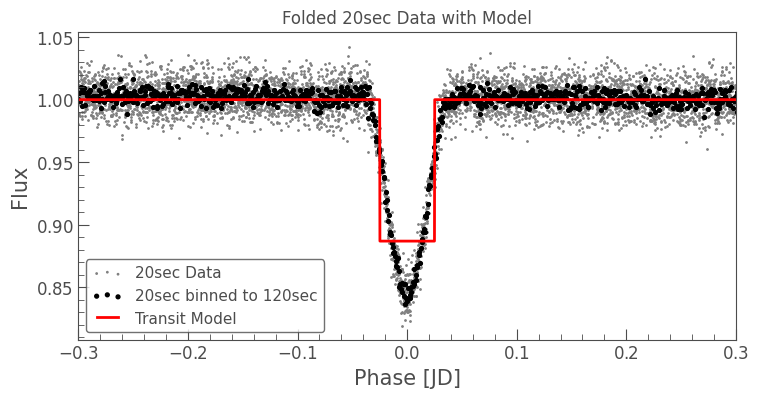

In [10]:
# Create a BLS model using the BLS parameters
planet_b_model1 = bls1.get_transit_model(period=planet_b_period1, 
                                       transit_time=planet_b_t01, 
                                       duration=planet_b_dur1)

planet_b_model2 = bls2.get_transit_model(period=planet_b_period2, 
                                       transit_time=planet_b_t02, 
                                       duration=planet_b_dur2)

# bin the light curve (this often helps to make transits more visible)
lc_binned1=lc1.bin(binsize=6)
lc_binned2=lc2.bin(time_bin_size=0.01)


#ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax1 = lc1.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(color='grey',label='20sec Data')
lc_binned1.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(ax=ax1,color='black',s=30,label='20sec binned to 120sec')
planet_b_model1.fold(planet_b_period1, planet_b_t01).plot(ax=ax1, c='r', lw=2,label='Transit Model')
ax1.set_xlim(-0.3, 0.3);
ax1.set_title('Folded 20sec Data with Model')



Text(0.5, 1.0, 'Folded 120sec Data with Transit Model')

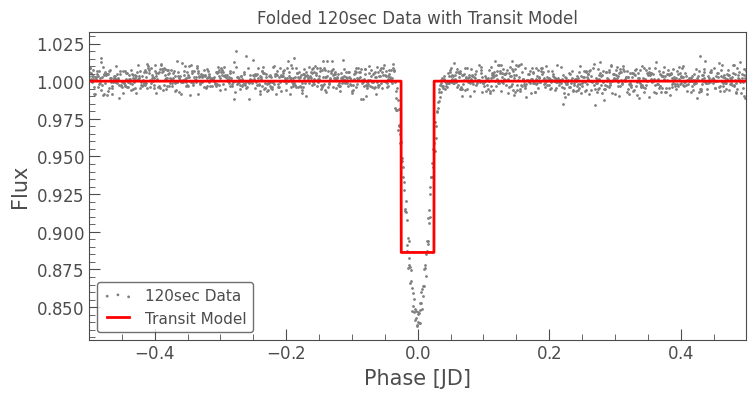

In [11]:



ax2 = lc2.fold(period=planet_b_period2, epoch_time=planet_b_t02).scatter(color='grey',label='120sec Data')
# lc_binned2.fold(period=planet_b_period2, epoch_time=planet_b_t02).scatter(ax=ax2,color='black',s=30,label='binned')
planet_b_model2.fold(planet_b_period2, planet_b_t02).plot(ax=ax2, c='r', lw=2,label='Transit Model')
ax2.set_xlim(-0.5, 0.5);
ax2.set_title('Folded 120sec Data with Transit Model')




Text(0.5, 1.0, 'Folded Overplot of Binned 20sec Data and 120sec Data')

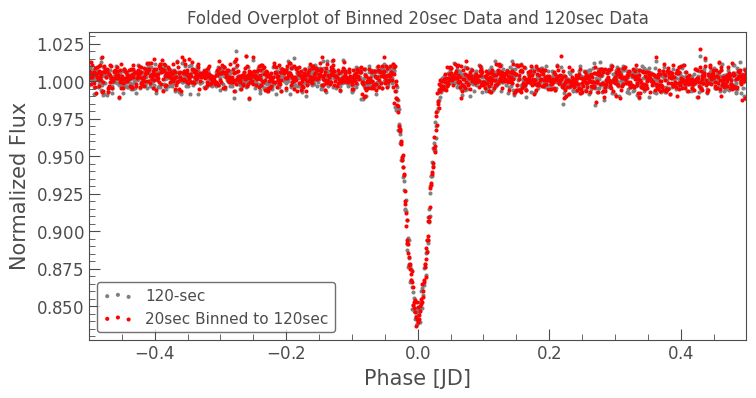

In [12]:
ax3 = lc2.fold(period=planet_b_period2, epoch_time=planet_b_t02).scatter(color='grey',s=15,label='120-sec')
lc_binned1.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(ax=ax3,color='red',s=15,label='20sec Binned to 120sec')
#lc_binned3.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(ax=ax3,color='blue',s=30,label='20sec binned')
#lc_binned2.fold(period=planet_b_period2, epoch_time=planet_b_t02).scatter(ax=ax3,color='black',s=30,label='binned')
ax3.set_xlim(-0.5, 0.5);
ax3.set_title('Folded Overplot of Binned 20sec Data and 120sec Data')

That looks pretty good! The data (grey and black) is well described by the model. Note that set_xlim will have to be adjusted for other stars, since the transit only lasts for a short fraction of the orbital period.

As a next step, we can look for additional planets. To do this, we must first mask out the data from the first planet (why?). The following commands do this and then plot the light curve again, highliting the maked out transits.

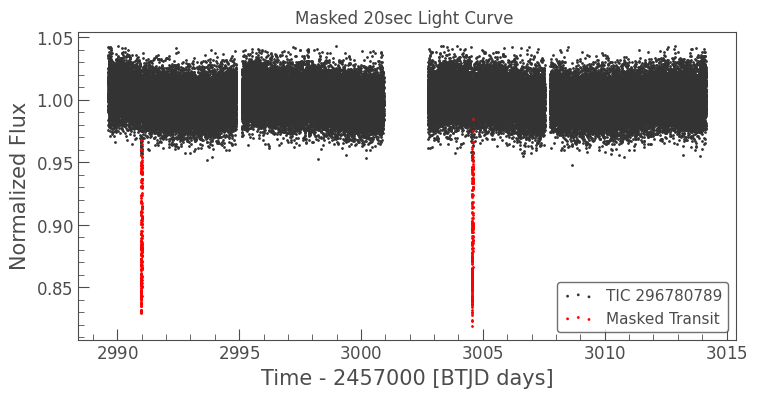

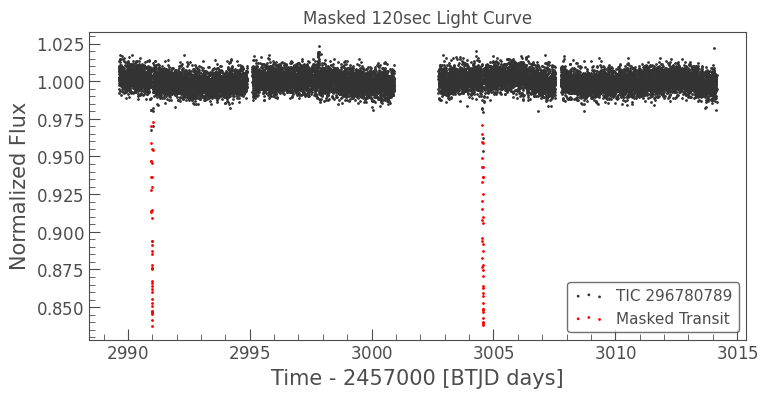

In [13]:
# Create a cadence mask using the BLS parameters
planet_b_mask1 = bls1.get_transit_mask(period=planet_b_period1,
                                     transit_time=planet_b_t01,
                                     duration=planet_b_dur1)
planet_b_mask2 = bls2.get_transit_mask(period=planet_b_period2,
                                     transit_time=planet_b_t02-0.001,
                                     duration=(planet_b_dur2+planet_b_dur2*0.085))

masked_lc1 = lc1[~planet_b_mask1]
ax1 = masked_lc1.scatter();
lc1[planet_b_mask1].scatter(ax=ax1, c='r', label='Masked Transit').set_title('Masked 20sec Light Curve ');


masked_lc2 = lc2[~planet_b_mask2]
ax2 = masked_lc2.scatter();
lc2[planet_b_mask2].scatter(ax=ax2, c='r', label='Masked Transit').set_title('Masked 120sec Light Curve');



The resulting plot shows that our data contained 4 transits of the planet found above. Now we can run another BLS search but leaving out the data of the first transiting planet. For comparison, we also overplot the original periodogram that includes the first planet.

Text(0.5, 1.0, '120sec Periodogram with Transits Removed')

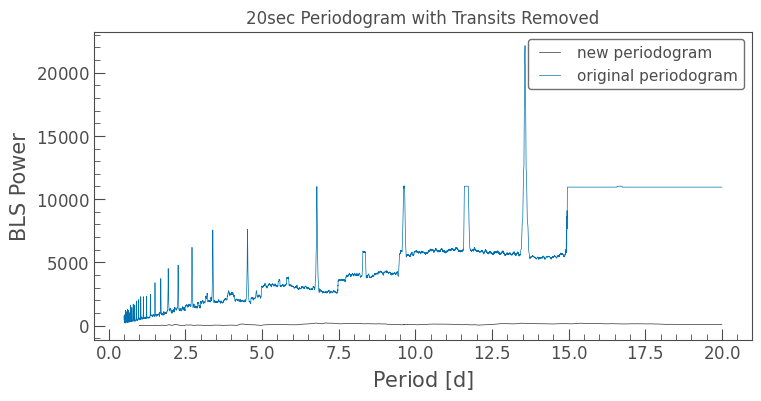

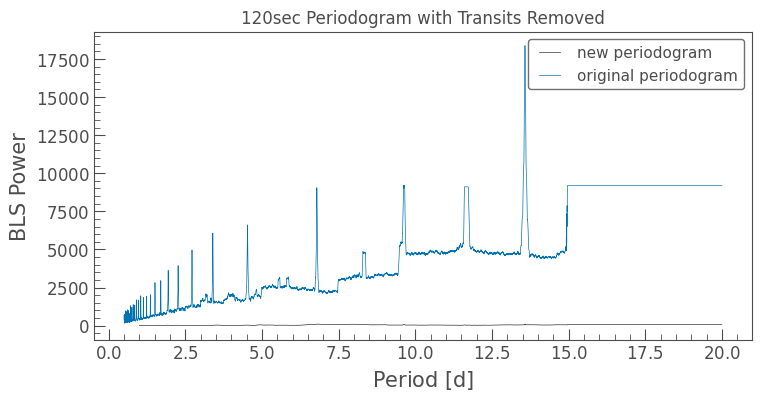

In [14]:
bls_original1=bls1
period = np.linspace(1, 20, 10000)
bls1 = masked_lc1.to_periodogram(method='bls', period=period, frequency_factor=500)
ax1=bls1.plot(label='new periodogram')
bls_original1.plot(ax=ax1,label='original periodogram').set_title('20sec Periodogram with Transits Removed')


bls_original2=bls2
period = np.linspace(1, 20, 10000)
bls2 = masked_lc2.to_periodogram(method='bls', period=period, frequency_factor=500)
ax2=bls2.plot(label='new periodogram')
bls_original2.plot(ax=ax2,label='original periodogram').set_title('120sec Periodogram with Transits Removed')





Text(0.5, 1.0, '120sec Periodogram with Transits Removed')

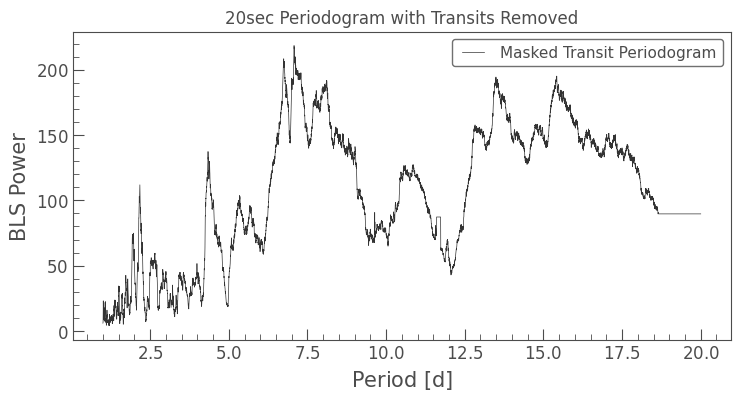

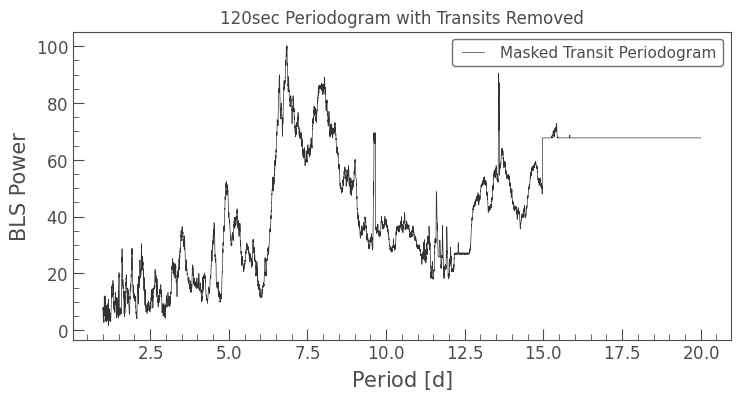

In [18]:
bls1.plot(label='Masked Transit Periodogram').set_title('20sec Periodogram with Transits Removed')
bls2.plot(label='Masked Transit Periodogram').set_title('120sec Periodogram with Transits Removed')

In [16]:
data = {}
print('20sec')
print('Period:',planet_b_period1)
print('Transit: ',planet_b_t01)
print('Duration: ',planet_b_dur1)
print('Depth: ',planet_b_depth1)
print()


print('120sec')
print('Period:',planet_b_period2)
print('Transit: ',planet_b_t02)
print('Duration: ',planet_b_dur2)
print('Depth: ',planet_b_depth2)

print()


print('TOI: ',toi)
print('TIC: ',tic)



data[(tic,toi)] = {"20sec":[planet_b_period1,planet_b_t01,planet_b_dur1,planet_b_depth1], "120sec" : [planet_b_period2,planet_b_t02,planet_b_dur2,planet_b_depth2]}


print(data)
                                    
                                     

20sec
Period: 13.578007800780078 d
Transit:  2990.985163423161
Duration:  0.05 d
Depth:  0.11308848127452581

120sec
Period: 13.576057605760576 d
Transit:  2990.986436582837
Duration:  0.05 d
Depth:  0.11371059613410704

TOI:  573
TIC:  296780789
{(296780789, 573): {'20sec': [<Quantity 13.5780078 d>, <Time object: scale='tdb' format='btjd' value=2990.985163423161>, <Quantity 0.05 d>, <Quantity 0.11308848>], '120sec': [<Quantity 13.57605761 d>, <Time object: scale='tdb' format='btjd' value=2990.986436582837>, <Quantity 0.05 d>, <Quantity 0.1137106>]}}


In [17]:
##lc.interact_bls()